In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({'font.size': 18})

In [2]:
data = pd.read_csv('../../../..//datasets/compositepars_2019.08.21_11.02.05.csv')
data

,rowid,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_controvflag,fpl_disc,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,...,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,1,11 Com,b,11 Com b,Radial Velocity,0,2007,326.030000,0.320000,-0.320000,...,0.090,-0.090,0.0,[Fe/H],<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,NaN,NaN,NaN,NaN,NaN
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,2009,516.219970,3.200000,-3.200000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,1.560,0.540,-0.540,0.0,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...
2,3,14 And,b,14 And b,Radial Velocity,0,2008,185.840000,0.230000,-0.230000,...,0.030,-0.030,0.0,[Fe/H],<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,4.500,1.900,-1.900,0.0,<a refstr=BAINES_ET_AL__2009 href=https://ui.a...
3,4,14 Her,b,14 Her b,Radial Velocity,0,2002,1773.400020,2.500000,-2.500000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,5.240,NaN,NaN,0.0,<a refstr=TURNBULL_2015 href=https://ui.adsabs...
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1996,798.500000,1.000000,-1.000000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,7.400,0.100,-0.100,0.0,<a refstr=BULDGEN_ET_AL__2016 href=https://ui....
5,6,18 Del,b,18 Del b,Radial Velocity,0,2008,993.300000,3.200000,-3.200000,...,0.023,-0.023,0.0,[Fe/H],<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,1.100,0.100,-0.100,0.0,<a refstr=BAINES_ET_AL__2009 href=https://ui.a...
6,7,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,0,2008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.005,NaN,NaN,0.0,<a refstr=LACHAPELLE_ET_AL__2015 href=https://...
7,8,24 Boo,b,24 Boo b,Radial Velocity,0,2018,30.350600,0.007800,-0.007700,...,0.030,-0.030,0.0,[Fe/H],<a refstr=TAKARADA_ET_AL__2018 href=https://ui...,6.920,4.830,-2.750,0.0,<a refstr=TAKARADA_ET_AL__2018 href=https://ui...
8,9,24 Sex,b,24 Sex b,Radial Velocity,0,2010,452.800000,2.100000,-4.500000,...,0.040,-0.040,0.0,[Fe/H],<a refstr=JOHNSON_ET_AL__2010 href=https://ui....,2.700,0.400,-0.400,0.0,<a refstr=JOHNSON_ET_AL__2010 href=https://ui....
9,10,24 Sex,c,24 Sex c,Radial Velocity,0,2010,883.000000,32.400000,-13.800000,...,0.040,-0.040,0.0,[Fe/H],<a refstr=JOHNSON_ET_AL__2010 href=https://ui....,2.700,0.400,-0.400,0.0,<a refstr=JOHNSON_ET_AL__2010 href=https://ui....


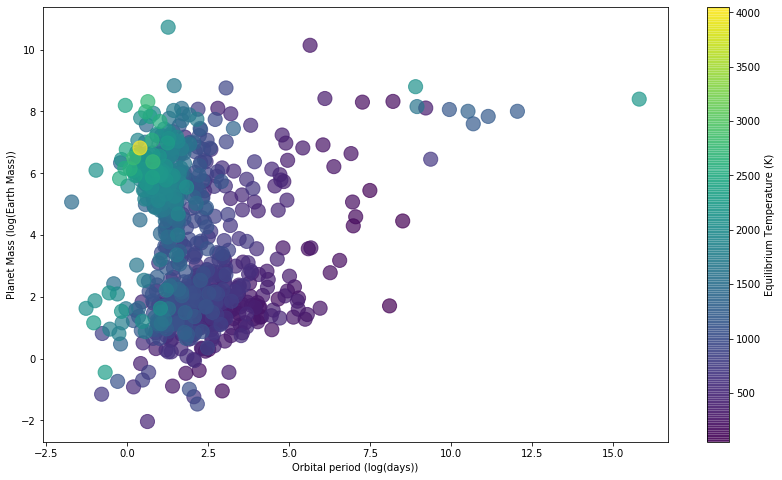

In [3]:
fig, ax = plt.subplots(figsize=(14,8))

#sort data by increasing temp
#put everything in np arrays because
temp_vals = np.array(data['fpl_eqt'].values)
mass_vals = np.array(data['fpl_bmasse'].values)
rad_vals = np.array(data['fpl_rade'].values)
orb_vals = np.array(data['fpl_orbper'].values)

#get rid of nans
keep_temp = ~np.isnan(temp_vals)
keep_rad = ~np.isnan(rad_vals)
keep_orb = ~np.isnan(orb_vals)
keep_mass = ~np.isnan(mass_vals)

keep = np.logical_and(np.array(keep_temp), np.array(keep_rad))
keep = np.logical_and(np.array(keep), np.array(keep_orb))
keep = np.logical_and(np.array(keep), np.array(keep_mass))


#sort by temp
sorted_orb = [x for _,x in sorted(zip(temp_vals[keep], orb_vals[keep]))]
sorted_mass = [x for _,x in sorted(zip(temp_vals[keep], mass_vals[keep]))]
sorted_rad = [x for _,x in sorted(zip(temp_vals[keep], rad_vals[keep]))]
sorted_temp = [x for _,x in sorted(zip(temp_vals[keep], temp_vals[keep]))]

marker_size = np.array(sorted_rad)

#plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=10*marker_size**2, alpha=0.7, c=sorted_temp)
plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=200, alpha=0.7, c=sorted_temp)


plt.xlabel("Orbital period (log(days))")
plt.ylabel("Planet Mass (log(Earth Mass))")

cbar = plt.colorbar()
cbar.set_label("Equilibrium Temperature (K)")

plt.show()





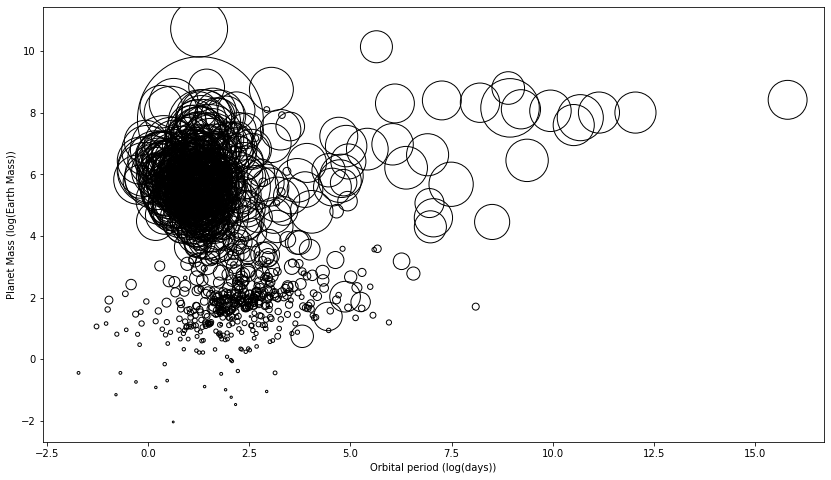

In [4]:
fig, ax = plt.subplots(figsize=(14,8))

sorted_orb = [x for _,x in sorted(zip(rad_vals[keep], orb_vals[keep]))]
sorted_mass = [x for _,x in sorted(zip(rad_vals[keep], mass_vals[keep]))]
sorted_rad = [x for _,x in sorted(zip(rad_vals[keep], rad_vals[keep]))]
sorted_temp = [x for _,x in sorted(zip(rad_vals[keep], temp_vals[keep]))]

marker_size = np.array(sorted_rad)

#plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=10*marker_size**2, alpha=0.7, c=sorted_temp)
plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=10*marker_size**2, facecolors='none', edgecolors='k')


plt.xlabel("Orbital period (log(days))")
plt.ylabel("Planet Mass (log(Earth Mass))")


plt.show()

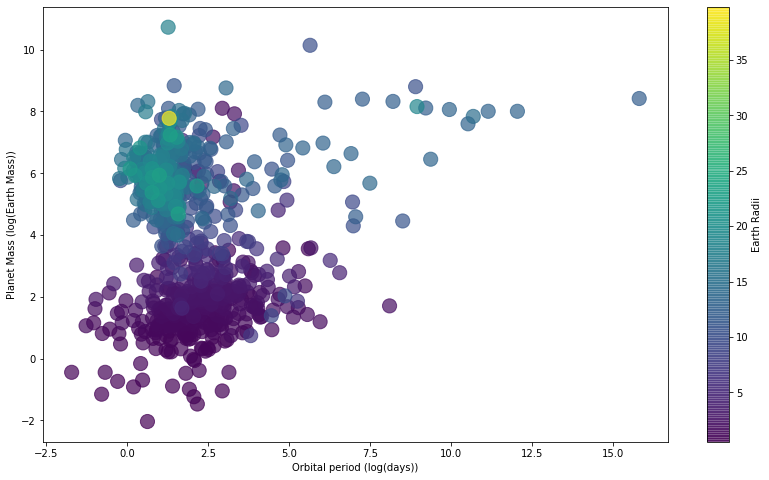

In [5]:

fig, ax = plt.subplots(figsize=(14,8))

sorted_orb = [x for _,x in sorted(zip(rad_vals[keep], orb_vals[keep]))]
sorted_mass = [x for _,x in sorted(zip(rad_vals[keep], mass_vals[keep]))]
sorted_rad = [x for _,x in sorted(zip(rad_vals[keep], rad_vals[keep]))]
sorted_temp = [x for _,x in sorted(zip(rad_vals[keep], temp_vals[keep]))]

marker_size = np.array(sorted_rad)

plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=200, alpha=0.7, c=sorted_rad)
#plt.scatter(np.log(sorted_orb), np.log(sorted_mass), marker='o', s=10*marker_size**2, facecolors='none', edgecolors='k')


plt.xlabel("Orbital period (log(days))")
plt.ylabel("Planet Mass (log(Earth Mass))")

cbar = plt.colorbar()
cbar.set_label("Earth Radii")


plt.show()